# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.txt"
ride_data_to_load = "ride_data.txt"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [7]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [23]:
#  1. Get the total rides for each city type
all_rides = pyber_data_df.groupby(['type'])["city"]
all_rides.count()

type
Rural        125
Suburban     625
Urban       1625
Name: city, dtype: int64

In [60]:
# 2. Get the total drivers for each city type
all_drivers= pyber_data_df.groupby('type')['driver_count'] 
all_drivers=all_drivers.sum() 
all_drivers

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [32]:
#  3. Get the total amount of fares for each city type
all_fares= pyber_data_df.groupby('type')['fare'].sum().map('${:.2f}'.format) 
all_fares

type
Rural        $4327.93
Suburban    $19356.33
Urban       $39854.38
Name: fare, dtype: object

In [35]:
#  4. Get the average fare per ride for each city type. 
avg_fare_ride=pyber_data_df.groupby('type')['fare'].mean().map('${:.2f}'.format) 
avg_fare_ride

type
Rural       $34.62
Suburban    $30.97
Urban       $24.53
Name: fare, dtype: object

In [57]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver=pyber_data_df.groupby('type')[['fare','driver_count']].sum()  
avg_fare_driver=(avg_fare_driver['fare']/avg_fare_driver['driver_count']).map('${:.2f}'.format)   
avg_fare_driver

type
Rural       $8.06
Suburban    $2.26
Urban       $0.67
dtype: object

In [63]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df= pd.DataFrame({'Fare/Driver':avg_fare_driver, 'price/location':avg_fare_ride, 'total price':all_fares, 'Drivers':all_drivers})

In [65]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None 
pyber_summary_df

,Fare/Driver,price/location,total price,Drivers
Rural,$8.06,$34.62,$4327.93,537
Suburban,$2.26,$30.97,$19356.33,8570
Urban,$0.67,$24.53,$39854.38,59602


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [66]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [117]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df=pyber_data_df.groupby(['date','type'])['fare'].sum() 
df

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [118]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
df = df.reset_index()
df

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [119]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df = df.pivot_table(index='date',columns='type', values='fare').fillna(0)

In [120]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'. 
df.loc['2019-01-01':'2019-04-29',:]

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,0.0,0.00,37.91
2019-01-01 00:46:46,0.0,47.74,0.00
2019-01-01 02:07:24,0.0,24.07,0.00
2019-01-01 03:46:50,0.0,0.00,7.57
2019-01-01 05:23:21,0.0,0.00,10.75
...,...,...,...
2019-04-28 14:28:36,0.0,0.00,11.46
2019-04-28 16:29:16,0.0,0.00,36.42
2019-04-28 17:26:52,0.0,0.00,31.43


In [121]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
df.index = pd.to_datetime(df.index)  
df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,0.0,0.00,37.91
2019-01-01 00:46:46,0.0,47.74,0.00
2019-01-01 02:07:24,0.0,24.07,0.00
2019-01-01 03:46:50,0.0,0.00,7.57
2019-01-01 05:23:21,0.0,0.00,10.75
...,...,...,...
2019-05-08 04:20:00,0.0,0.00,21.99
2019-05-08 04:39:49,0.0,0.00,18.45
2019-05-08 07:29:01,0.0,0.00,18.55


In [122]:
# 7. Check that the datatype for the index is datetime using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     2375 non-null   float64
 1   Suburban  2375 non-null   float64
 2   Urban     2375 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [126]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df=df.resample('W').sum()
df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


<AxesSubplot:xlabel='date'>

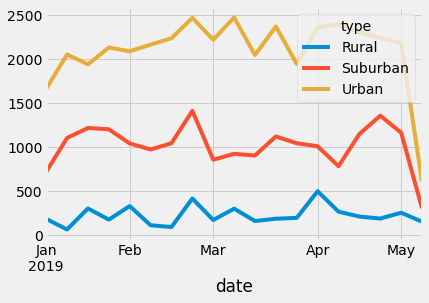

In [128]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

df.plot()